#Import data and Data Information

In [ ]:
!pip install sort-dataframeby-monthorweek
!pip install sorted-months-weekdays
!pip install scikit-plot
!pip install catboost

In [ ]:
import sort_dataframeby_monthorweek as sd

def sort_month(df, column_name):
    return sd.Sort_Dataframeby_Month(df, column_name)

In [ ]:
import numpy as np

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import folium
from folium.plugins import HeatMap
import plotly.express as px
import plotly.graph_objects as go
import scikitplot as skplt

from sklearn.preprocessing import LabelEncoder

from sklearn.model_selection import train_test_split

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
from catboost import CatBoostClassifier
from lightgbm import LGBMClassifier

from sklearn.metrics import accuracy_score,classification_report, confusion_matrix
from sklearn.metrics import roc_curve, roc_auc_score

In [ ]:
pd.options.display.max_columns = 33

##Importing

In [ ]:
# from google.colab import drive
# drive.mount('/content/drive')
# train = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Dataset/train.csv')
train = pd.read_csv(
    "https://raw.githubusercontent.com/Egsy05/Booking-Hotel/main/train.csv"
)

In [ ]:
train.head(3)

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,bookingID
0,"Crystal Cove, Barbados Barbados",0,8,2019,January,2,10,0,4,2,0.0,0,BB,ITA,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,314.0,NaN,0,Transient,38.4,0,0,Check-Out,2019-01-14,1
1,"Greensboro Courtyard Greensboro, NC",1,524,2018,December,51,15,0,2,2,0.0,0,BB,PRT,Groups,TA/TO,0,0,0,A,A,0,Non Refund,1.0,NaN,0,Transient,62.8,0,0,Canceled,2017-10-21,2
2,"The Westin Peachtree Plaza, Atlanta Atlanta, GA",1,175,2019,May,20,19,1,2,2,0.0,0,BB,PRT,Groups,TA/TO,0,0,0,A,A,0,Non Refund,12.0,NaN,0,Transient,110.0,0,0,Canceled,2018-11-25,3


##Information

In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 83293 entries, 0 to 83292
Data columns (total 33 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   hotel                           83293 non-null  object 
 1   is_canceled                     83293 non-null  int64  
 2   lead_time                       83293 non-null  int64  
 3   arrival_date_year               83293 non-null  int64  
 4   arrival_date_month              83293 non-null  object 
 5   arrival_date_week_number        83293 non-null  int64  
 6   arrival_date_day_of_month       83293 non-null  int64  
 7   stays_in_weekend_nights         83293 non-null  int64  
 8   stays_in_week_nights            83293 non-null  int64  
 9   adults                          83293 non-null  int64  
 10  children                        83290 non-null  float64
 11  babies                          83293 non-null  int64  
 12  meal                            

In [ ]:
train.describe()

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,company,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests,bookingID
count,83293.000000,83293.000000,83293.000000,83293.000000,83293.000000,83293.000000,83293.000000,83293.000000,83290.000000,83293.000000,83293.000000,83293.000000,83293.000000,83293.000000,71889.000000,4734.000000,83293.000000,83293.000000,83293.000000,83293.000000,83293.000000
mean,0.369503,103.914230,2018.156808,27.164023,15.786116,0.930390,2.503812,1.854466,0.103614,0.008032,0.030243,0.086994,0.141765,0.223068,86.867282,190.003802,2.352238,101.724373,0.061818,0.571945,41647.000000
std,0.482673,106.874124,0.706656,13.623752,8.775931,1.004196,1.924511,0.606139,0.398821,0.100641,0.171255,0.862988,1.554390,0.656237,110.875605,131.969152,17.820652,48.082552,0.245027,0.793742,24044.762323
min,0.000000,0.000000,2017.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,6.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,0.000000,18.000000,2018.000000,16.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.000000,62.000000,0.000000,69.530000,0.000000,0.000000,20824.000000
50%,0.000000,69.000000,2018.000000,27.000000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,14.000000,183.000000,0.000000,94.500000,0.000000,0.000000,41647.000000
75%,1.000000,160.000000,2019.000000,38.000000,23.000000,2.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,229.000000,270.000000,0.000000,126.000000,0.000000,1.000000,62470.000000
max,1.000000,737.000000,2019.000000,53.000000,31.000000,19.000000,50.000000,55.000000,10.000000,10.000000,1.000000,26.000000,70.000000,21.000000,535.000000,543.000000,391.000000,508.000000,8.000000,5.000000,83293.000000


#Data Cleaning

In [ ]:
missing = pd.DataFrame(data= train.isna().sum().reset_index())
missing.columns = ['feature','total_missing']
missing['percentage'] = round((missing['total_missing']/len(train))*100,2)
missing = missing[missing['total_missing']>0].sort_values('percentage',ascending=False).reset_index(drop=True)
missing

,feature,total_missing,percentage
0,company,78559,94.32
1,agent,11404,13.69
2,country,346,0.42
3,children,3,0.00


The data have high null on company this **can not** be drop.

We need to fill out the null data in company and agent. Before that we need to understand the data of company and agent.

(in country column, the dtype is object so we skip it for next data handling process. In children column, we are going to drop them because the percentage contribution to the data is very small)

In [ ]:
desc_of_null = ['company','agent']
train[desc_of_null].describe()

,company,agent
count,4734.000000,71889.000000
mean,190.003802,86.867282
std,131.969152,110.875605
min,6.000000,1.000000
25%,62.000000,9.000000
50%,183.000000,14.000000
75%,270.000000,229.000000
max,543.000000,535.000000


Now we need to focus on min information here. We understand that country and agent does not have 0 as value so we going to fill the company and agent null information with 0.

The idea of 0 it self is to asign the company and agent as unidentify. So we don't lose any information regarding the null data from company and agent, at the same time the 0 value can determine wheter this could potentialy a reasone why a customer cancel in the model later.

In [ ]:
df1 = train.copy()
replace_null = ['company','agent']
df1[replace_null] = df1[replace_null].fillna(value=0)
df1.isnull().sum()

hotel                               0
is_canceled                         0
lead_time                           0
arrival_date_year                   0
arrival_date_month                  0
arrival_date_week_number            0
arrival_date_day_of_month           0
stays_in_weekend_nights             0
stays_in_week_nights                0
adults                              0
children                            3
babies                              0
meal                                0
country                           346
market_segment                      0
distribution_channel                0
is_repeated_guest                   0
previous_cancellations              0
previous_bookings_not_canceled      0
reserved_room_type                  0
assigned_room_type                  0
booking_changes                     0
deposit_type                        0
agent                               0
company                             0
days_in_waiting_list                0
customer_typ

Now there only children and country that has null data. For analysis we can't just fill the country and children with any information because it could cause miss information so we are going to drop.

In [ ]:
df2 = df1.dropna()

In [ ]:
missing_df2 = pd.DataFrame(df2.isnull().sum().reset_index())
missing_df2.columns = ['feature','null']
missing_df2 = missing_df2[missing_df2['null']>0]
missing_df2

,feature,null


In [ ]:
df2.duplicated().sum()

0

Now there are no more null and duplicated data.

There still could be an error data where in age category there are no adults, no children, and no babies but still check in and check out

In [ ]:
df2[(df2['babies'] == 0)&(df2['adults']==0)&(df2['children']==0)].head(3)

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,bookingID
1377,Sheraton Grand Rio Hotel & Resort Rio de Janei...,0,37,2018,November,47,17,1,3,0,0.0,0,SC,BRA,Online TA,TA/TO,0,0,0,A,K,1,No Deposit,9.0,0.0,0,Transient,97.4,1,1,Check-Out,2018-11-21,1378
1726,Protea Hotel by Marriott Cape Town Sea Point C...,0,31,2018,December,53,27,2,8,0,0.0,0,BB,PRT,Direct,Direct,0,0,0,D,D,3,No Deposit,0.0,0.0,0,Transient,28.0,1,0,Check-Out,2019-01-06,1727
1991,Sheraton Mexico City Maria Isabel Hotel Mexico...,0,0,2019,February,9,27,0,0,0,0.0,0,BB,PRT,Online TA,TA/TO,1,0,0,A,K,0,No Deposit,85.0,0.0,0,Transient,0.0,0,0,Check-Out,2019-02-27,1992


In [ ]:
#droping the data that has no one in it
check_data = (df2['babies'] == 0)&(df2['adults']==0)&(df2['children']==0)
df2 = df2[~check_data]

In [ ]:
#now checking if year arrival is make sense
df2['arrival_date_year'].value_counts()

arrival_date_year
2018    39407
2019    28250
2017    15168
Name: count, dtype: int64

In [ ]:
#Understand that in columns is_canceled, they are telling us about the book is cancel or not.
#In reservation_status, it is also telling us about the same as is_canceled information
#checking for flaw between is canceled and reservation status
No_show = df2[(df2['reservation_status']=='No-Show')&(df2['is_canceled']==0)]
Canceled = df2[(df2['reservation_status']=='Canceled')&(df2['is_canceled']==0)]
Check_out = df2[(df2['reservation_status']=='Check-Out')&(df2['is_canceled']==1)]

In [ ]:
No_show

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,bookingID


In [ ]:
Canceled

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,bookingID


In [ ]:
Check_out

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,bookingID


There are no flaw between is_canceled and reservation_status. In other words, this columns actually the same.

#Exploring our Data

Exploratory data analyst

##Customer Distribution

We can see our distribution of our customers by country

In [ ]:
df_no_cancel = df2[df2['is_canceled']==0]
customers_distribution = df_no_cancel['country'].value_counts().reset_index()
customers_distribution

,country,count
0,PRT,14715
1,GBR,6686
2,FRA,5908
3,ESP,4373
4,DEU,4260
...,...,...
151,BFA,1
152,BRB,1
153,NPL,1
154,ASM,1


The country data are using country abbreviation base on International Organization for Standardization (ISO 3166-1)

In [ ]:
map = folium.Map()
guests_map = px.choropleth(customers_distribution, locations = customers_distribution['country'],
                           color = customers_distribution['count'],
                           hover_name = customers_distribution['country'],
                           template='plotly_dark'
                           )
guests_map.show()

Looks like our customers are mostly from Europe

##Top 10 countries

In [ ]:
top_country = df_no_cancel.groupby(['country']
            ).agg(count=('bookingID','count')
            ).sort_values('count',ascending=False
                          ).head(10).reset_index()

In [ ]:
px.bar(top_country, x='country', y='count',
       orientation='v',
       width=750,
       height=400,
       template = 'plotly_dark'
       )

##Most visited Hotels by top countries

We went deeper to see which hotels people of the top country like to visit

In [ ]:
filter = df_no_cancel[df_no_cancel['country'].isin(top_country['country'].values)]
filter_2 = filter.groupby(['hotel']).agg(count=('hotel','count')).sort_values('count',ascending=False).reset_index().head(10)
top_hotel = filter_2['hotel'].values
filter_3 = filter[filter['hotel'].isin(top_hotel)]
hotel_top_country = filter_3.groupby(['hotel','country']).agg(count=('country','count')).reset_index()
hotel_top_country['percentage'] = filter_3.groupby(['hotel', 'country']).size().groupby(level=0).apply(lambda x: round(100 * x / float(x.sum()),2)).values
hotel_top_country.columns = ['hotel', 'country', 'counts', 'percentage']

In [ ]:
country=hotel_top_country['country'].values.tolist()
total=[4262,4379,5915,6689,14788]
new_total = []
i=0
y=0
while i <= len(country)-1:
  data=total[y]
  new_total.append(data)
  i+=1
  y+=1
  if y == 5:
    y = 0

In [ ]:
percent_df = pd.DataFrame(new_total)
percent_df.columns = ['new_total']

In [ ]:
hotel_top_country['percent_of_all'] = round((hotel_top_country['counts']/percent_df['new_total'])*100,2)

In [ ]:
hotel_top_country

,hotel,country,counts,percentage,percent_of_all
0,Baton Rouge Acadian Centre/LSU Area Courtyard ...,BEL,21,2.95,0.49
1,Baton Rouge Acadian Centre/LSU Area Courtyard ...,DEU,60,8.44,1.37
2,Baton Rouge Acadian Centre/LSU Area Courtyard ...,ESP,70,9.85,1.18
3,Baton Rouge Acadian Centre/LSU Area Courtyard ...,FRA,114,16.03,1.70
4,Baton Rouge Acadian Centre/LSU Area Courtyard ...,GBR,118,16.60,0.80
...,...,...,...,...,...
95,"The Ritz-Carlton, Berlin Berlin, Germany",IRL,27,3.89,0.63
96,"The Ritz-Carlton, Berlin Berlin, Germany",ITA,29,4.18,0.66
97,"The Ritz-Carlton, Berlin Berlin, Germany",NLD,14,2.02,0.24
98,"The Ritz-Carlton, Berlin Berlin, Germany",PRT,234,33.72,3.50


In [ ]:
px.bar(hotel_top_country, x='counts', y='hotel',
       color='country',
       barmode='stack',
       orientation='h',
       height=500,
       width=1500,
       text=hotel_top_country['percent_of_all'].apply(lambda x: '{0:1.2f}%'.format(x)),
       title='Stacked Bar Chart Example'
       )

Now we know that this is the most frequent hotel that are visited by our customers from Europe

##Average daily rate per-room in every top country

In [ ]:
data_top_country = df_no_cancel[df_no_cancel['country'].isin(top_country['country'].values)]

In [ ]:
px.box(data_frame = data_top_country, x = 'country', y = 'adr', color = 'country', template = 'plotly_dark')

##Country average daily rate (adr) throughout the months (all year)

In [ ]:
data_FRA = df_no_cancel[(df_no_cancel['country']=='FRA')]
data_ITA = df_no_cancel[(df_no_cancel['country']=='ITA')]
data_BEL = df_no_cancel[(df_no_cancel['country']=='BEL')]
data_GBR = df_no_cancel[(df_no_cancel['country']=='GBR')]
data_ESP = df_no_cancel[(df_no_cancel['country']=='ESP')]
data_DEU = df_no_cancel[(df_no_cancel['country']=='DEU')]
data_PRT = df_no_cancel[(df_no_cancel['country']=='PRT')]
data_IRL = df_no_cancel[(df_no_cancel['country']=='IRL')]
data_USA = df_no_cancel[(df_no_cancel['country']=='USA')]
data_NLD = df_no_cancel[(df_no_cancel['country']=='NLD')]

In [ ]:
FRA_months = data_FRA.groupby(['arrival_date_month'])['adr'].mean().reset_index()
ITA_months = data_ITA.groupby(['arrival_date_month'])['adr'].mean().reset_index()
first_merge = FRA_months.merge(ITA_months, on = 'arrival_date_month')
first_merge.columns = ['arrival_date_month','FRA_adr','ITA_adr']
BEL_months = data_BEL.groupby(['arrival_date_month'])['adr'].mean().reset_index()
GBR_months = data_GBR.groupby(['arrival_date_month'])['adr'].mean().reset_index()
sec_merge = BEL_months.merge(GBR_months, on = 'arrival_date_month')
sec_merge.columns = ['arrival_date_month','BEL_adr','GBR_adr']
ESP_months = data_ESP.groupby(['arrival_date_month'])['adr'].mean().reset_index()
DEU_months = data_DEU.groupby(['arrival_date_month'])['adr'].mean().reset_index()
thrd_merge = ESP_months.merge(DEU_months, on = 'arrival_date_month')
thrd_merge.columns = ['arrival_date_month','ESP_adr','DEU_adr']
PRT_months = data_PRT.groupby(['arrival_date_month'])['adr'].mean().reset_index()
IRL_months = data_IRL.groupby(['arrival_date_month'])['adr'].mean().reset_index()
frth_merge = PRT_months.merge(IRL_months, on = 'arrival_date_month')
frth_merge.columns = ['arrival_date_month','PRT_adr','IRL_adr']
USA_months = data_USA.groupby(['arrival_date_month'])['adr'].mean().reset_index()
NLD_months = data_NLD.groupby(['arrival_date_month'])['adr'].mean().reset_index()
ffth_merge = USA_months.merge(NLD_months, on = 'arrival_date_month')
ffth_merge.columns = ['arrival_date_month','USA_adr','NLD_adr']

first_sec_merge = first_merge.merge(sec_merge, on = 'arrival_date_month')
sec_sec_merge = thrd_merge.merge(frth_merge, on = 'arrival_date_month')

almost_merge = first_sec_merge.merge(sec_sec_merge, on ='arrival_date_month')
final_adr = almost_merge.merge(ffth_merge,on='arrival_date_month')

finally_adr = sort_month(final_adr, 'arrival_date_month')

In [ ]:
fig = go.Figure()

fig.add_trace(go.Scatter(x=finally_adr.arrival_date_month,
                         y=finally_adr.FRA_adr,
                         mode='lines+markers',
                         name='France'))
fig.add_trace(go.Scatter(x=finally_adr.arrival_date_month,
                         y=finally_adr.ITA_adr,
                         mode='lines+markers',
                         name='Italia'))
fig.add_trace(go.Scatter(x=finally_adr.arrival_date_month,
                         y=finally_adr.BEL_adr,
                         mode='lines+markers',
                         name='Belgia'))
fig.add_trace(go.Scatter(x=finally_adr.arrival_date_month,
                         y=finally_adr.GBR_adr,
                         mode='lines+markers',
                         name='Great Britain'))
fig.add_trace(go.Scatter(x=finally_adr.arrival_date_month,
                         y=finally_adr.ESP_adr,
                         mode='lines+markers',
                         name='Spain'))
fig.add_trace(go.Scatter(x=finally_adr.arrival_date_month,
                         y=finally_adr.DEU_adr,
                         mode='lines+markers',
                         name='Germany'))
fig.add_trace(go.Scatter(x=finally_adr.arrival_date_month,
                         y=finally_adr.PRT_adr,
                         mode='lines+markers',
                         name='Portugal'))
fig.add_trace(go.Scatter(x=finally_adr.arrival_date_month,
                         y=finally_adr.IRL_adr,
                         mode='lines+markers',
                         name='Ireland'))
fig.add_trace(go.Scatter(x=finally_adr.arrival_date_month,
                         y=finally_adr.USA_adr,
                         mode='lines+markers',
                         name='America'))
fig.add_trace(go.Scatter(x=finally_adr.arrival_date_month,
                         y=finally_adr.NLD_adr,
                         mode='lines+markers',
                         name='Netherland'))

In [ ]:
fig.update_layout(title='Country average daily rate (adr) throughout the months (all year)',
    xaxis_title='Month',
    yaxis_title='adr',
    template='plotly_dark',
    updatemenus=[
        dict(
            active=0,
            buttons=list([
                dict(label="All",
                     method="update",
                     args=[{"visible": [True, True, True, True, True, True, True, True, True, True]},
                           {"title": "Country average daily rate (adr) throughout the months (all year)"}]),
                dict(label="France",
                     method="update",
                     args=[{"visible": [True, False, False, False,False, False, False, False, False, False]},
                           {"title": "France average daily rate (adr) throughout the months (all year)"}]),
                dict(label="Italia",
                     method="update",
                     args=[{"visible": [False, True, False, False,False, False, False, False, False, False]},
                           {"title": "Italia average daily rate (adr) throughout the months (all year)"}]),
                dict(label="Belgium",
                     method="update",
                     args=[{"visible": [False, False, True, False,False, False, False, False, False, False]},
                           {"title": "Belgium average daily rate (adr) throughout the months (all year)"}]),
                dict(label="Great Britain",
                     method="update",
                     args=[{"visible": [False, False, False, True,False, False, False, False, False, False]},
                           {"title": "Great Britain average daily rate (adr) throughout the months (all year)"}]),
                dict(label="Spain",
                     method="update",
                     args=[{"visible": [False, False, False, False, True, False, False, False, False, False]},
                           {"title": "Spain average daily rate (adr) throughout the months (all year)"}]),
                dict(label="Germany",
                     method="update",
                     args=[{"visible": [False, False, False, False, False, True, False, False, False, False]},
                           {"title": "Germany average daily rate (adr) throughout the months (all year)"}]),
                dict(label="Portugal",
                     method="update",
                     args=[{"visible": [False, False, False, False, False, False, True, False, False, False]},
                           {"title": "Portugal average daily rate (adr) throughout the months (all year)"}]),
                dict(label="Ireland",
                     method="update",
                     args=[{"visible": [False, False, False, False, False, False, False, True, False, False]},
                           {"title": "Ireland average daily rate (adr) throughout the months (all year)"}]),
                dict(label="United State",
                     method="update",
                     args=[{"visible": [False, False, False, False, False, False, False, False, True, False]},
                           {"title": "United State average daily rate (adr) throughout the months (all year)"}]),
                dict(label="Netherland",
                     method="update",
                     args=[{"visible": [False, False, False, False, False, False, False, False, False, True]},
                           {"title": "Netherland average daily rate (adr) throughout the months (all year)"}])
            ]),
        )
    ])

##Customer Type in top countries

In [ ]:
# df3 = data_top_country.copy()
# df3['date'] = df3['arrival_date_year'].astype(str)+'-'+df3['arrival_date_day_of_month'].astype(str)+'-'+df3['arrival_date_month'].astype(str)
cus_type_top_country =  data_top_country.groupby(['arrival_date_month','customer_type']).agg(count=('customer_type','count')).reset_index()
cus_type_top_country.head(4)

,arrival_date_month,customer_type,count
0,April,Contract,103
1,April,Group,9
2,April,Transient,2557
3,April,Transient-Party,1071


In [ ]:
data_Contract = cus_type_top_country[cus_type_top_country['customer_type']=='Contract'].reset_index()
data_Transient = cus_type_top_country[cus_type_top_country['customer_type']=='Transient'].reset_index()
data_Transient_Party = cus_type_top_country[cus_type_top_country['customer_type']=='Transient-Party'].reset_index()
data_Group = cus_type_top_country[cus_type_top_country['customer_type']=='Group'].reset_index()

customer_Contract = data_Contract.groupby(['arrival_date_month'])['count'].mean().reset_index()
customer_Transient = data_Transient.groupby(['arrival_date_month'])['count'].mean().reset_index()
customer_Transient_Party = data_Transient_Party.groupby(['arrival_date_month'])['count'].mean().reset_index()
customer_Group = data_Group.groupby(['arrival_date_month'])['count'].mean().reset_index()

merge_1 =customer_Contract.merge(customer_Transient, on = 'arrival_date_month')
merge_1.columns=['month','Contract','Transient']
merge_2 =customer_Transient_Party.merge(customer_Group,on='arrival_date_month')
merge_2.columns=['month','Transient-Party','Group']
final_merge_customer_type = merge_1.merge(merge_2, on = 'month')
final_merge_customer_type = sort_month(final_merge_customer_type, 'month')
final_merge_customer_type

,month,Contract,Transient,Transient-Party,Group
0,January,10.0,1833.0,486.0,15.0
1,February,18.0,2400.0,634.0,27.0
2,March,22.0,2794.0,962.0,24.0
3,April,103.0,2557.0,1071.0,9.0
4,May,171.0,2755.0,1031.0,32.0
5,June,190.0,2581.0,766.0,24.0
6,July,180.0,3254.0,924.0,13.0
7,August,258.0,3840.0,982.0,27.0
8,September,357.0,1953.0,1406.0,25.0
9,October,277.0,2203.0,1486.0,44.0


In [ ]:
px.line(final_merge_customer_type, x = 'month', y = ['Transient','Transient-Party','Contract','Group'],
        title = 'Customer Type (total average) over the Months (all year) by top countries', template = 'plotly_dark')

#Feature Engineering

In [ ]:
df3 = df2.copy()

In [ ]:
categorical_type = df3.dtypes==object
categorical_cols = df3.columns[categorical_type].tolist()
categorical_df = df3[categorical_cols]

In [ ]:
# numerical_df = df3.drop(columns=categorical_cols,axis=1)
# numerical_df = numerical_df.drop('is_canceled',axis=1)

In [ ]:
#checking categorical data value
for i in categorical_cols:
  print(df3[i].value_counts())

hotel
Renaissance New York Times Square Hotel New York, NY                           1368
Las Vegas Marriott Las Vegas, NV                                               1366
Sacramento Airport Natomas Courtyard Sacramento, CA                            1362
Crystal Cove, Barbados Barbados                                                1353
Protea Hotel by Marriott Midrand Midrand, South Africa                         1344
                                                                               ... 
The House, Barbados Barbados                                                   1244
Sheraton Grand Rio Hotel & Resort Rio de Janeiro, Brazil                       1242
African Pride Melrose Arch, Autograph Collection Johannesburg, South Africa    1241
W New York – Union Square New York, NY                                         1240
Residence Inn Rio de Janeiro Barra da Tijuca Barra da Tijuca, Brazil           1239
Name: count, Length: 64, dtype: int64
arrival_date_month
August       

In [ ]:
#droping object columns that has too many values and unrelateable data for modelling
droping = ['hotel','country','bookingID','reservation_status','reservation_status_date']
df3 = df3.drop(columns=droping)

##Encoding

In [ ]:
le = LabelEncoder()
#label encoder works by changing categorical value to numerical by their highest to the lowest count
#example, if in customer_type the highest counts was Transient that mean Transient is 0 and so on.
categorical_type = df3.dtypes==object
categorical_cols = df3.columns[categorical_type].tolist()
df3[categorical_cols] = df3[categorical_cols].apply(lambda col: le.fit_transform(col))

In [ ]:
#checking other columns again that might not needed in the model
df3.columns

Index(['is_canceled', 'lead_time', 'arrival_date_year', 'arrival_date_month',
       'arrival_date_week_number', 'arrival_date_day_of_month',
       'stays_in_weekend_nights', 'stays_in_week_nights', 'adults', 'children',
       'babies', 'meal', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type', 'agent',
       'company', 'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests'],
      dtype='object')

In [ ]:
# numerical_df.var().sort_values(ascending=False)

bookingID                         5.780145e+08
agent                             1.150778e+04
lead_time                         1.143362e+04
company                           2.871589e+03
adr                               2.296041e+03
days_in_waiting_list              3.188442e+02
arrival_date_week_number          1.851069e+02
arrival_date_day_of_month         7.700451e+01
stays_in_week_nights              3.629557e+00
previous_bookings_not_canceled    2.383265e+00
stays_in_weekend_nights           9.963949e-01
previous_cancellations            7.485529e-01
total_of_special_requests         6.296346e-01
arrival_date_year                 4.992723e-01
booking_changes                   4.114968e-01
adults                            3.623521e-01
children                          1.597710e-01
required_car_parking_spaces       5.947718e-02
is_repeated_guest                 2.902374e-02
babies                            1.016165e-02
dtype: float64

In [ ]:
# df3['agent'] = np.log(df3['agent'] + 1)
# df3['lead_time'] = np.log(df3['lead_time'] + 1)
# df3['company'] = np.log(df3['company'] + 1)
# df3['adr'] = np.log(df3['adr'] + 1)
# df3['days_in_waiting_list'] = np.log(df3['days_in_waiting_list'] + 1)
# df3['arrival_date_week_number'] = np.log(df3['arrival_date_week_number'] + 1)
# df3['arrival_date_day_of_month'] = np.log(df3['arrival_date_day_of_month'] + 1)

In [ ]:
df3.head()

,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests
0,0,8,2019,4,2,10,0,4,2,0.0,0,0,6,3,0,0,0,0,0,0,0,314.0,0.0,0,2,38.40,0,0
1,1,524,2018,2,51,15,0,2,2,0.0,0,0,4,3,0,0,0,0,0,0,1,1.0,0.0,0,2,62.80,0,0
2,1,175,2019,8,20,19,1,2,2,0.0,0,0,4,3,0,0,0,0,0,0,1,12.0,0.0,0,2,110.00,0,0
4,1,33,2017,11,39,26,2,3,2,0.0,0,0,5,3,0,0,0,0,0,0,0,16.0,0.0,0,2,57.92,0,1
5,1,395,2018,7,13,21,1,2,2,0.0,0,0,4,3,0,1,0,0,0,0,1,1.0,0.0,0,2,62.80,0,0


#Split train and test data

In [ ]:
X = df3.drop(columns='is_canceled')
y = df3['is_canceled']
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

#Fitting

In [ ]:
tree = DecisionTreeClassifier()
tree.fit(X_train,y_train)

DecisionTreeClassifier()

In [ ]:
forest = RandomForestClassifier()
forest.fit(X_train,y_train)

RandomForestClassifier()

In [ ]:
lgbm = LGBMClassifier(learning_rate = 1)
lgbm.fit(X_train, y_train)

[LightGBM] [Info] Number of positive: 24545, number of negative: 41715
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.024280 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1290
[LightGBM] [Info] Number of data points in the train set: 66260, number of used features: 27
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.370435 -> initscore=-0.530353
[LightGBM] [Info] Start training from score -0.530353


LGBMClassifier(learning_rate=1)

In [ ]:
gbc = GradientBoostingClassifier()
gbc.fit(X_train, y_train)

GradientBoostingClassifier()

In [ ]:
xgb = XGBClassifier(booster = 'gbtree', learning_rate = 0.1, max_depth = 5, n_estimators = 180)
xgb.fit(X_train, y_train)

XGBClassifier(base_score=None, booster='gbtree', callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=5, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=180, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [ ]:
cat = CatBoostClassifier(iterations=100)
cat.fit(X_train, y_train)

Learning rate set to 0.5
0:	learn: 0.4675014	total: 24.3ms	remaining: 2.41s
1:	learn: 0.4261419	total: 43.5ms	remaining: 2.13s
2:	learn: 0.4101163	total: 65.1ms	remaining: 2.1s
3:	learn: 0.3959839	total: 84.8ms	remaining: 2.03s
4:	learn: 0.3896919	total: 104ms	remaining: 1.97s
5:	learn: 0.3852389	total: 123ms	remaining: 1.93s
6:	learn: 0.3803579	total: 142ms	remaining: 1.88s
7:	learn: 0.3764050	total: 165ms	remaining: 1.9s
8:	learn: 0.3726493	total: 185ms	remaining: 1.87s
9:	learn: 0.3702192	total: 210ms	remaining: 1.89s
10:	learn: 0.3680831	total: 230ms	remaining: 1.86s
11:	learn: 0.3669791	total: 248ms	remaining: 1.82s
12:	learn: 0.3640704	total: 270ms	remaining: 1.8s
13:	learn: 0.3632421	total: 287ms	remaining: 1.76s
14:	learn: 0.3619205	total: 307ms	remaining: 1.74s
15:	learn: 0.3608590	total: 327ms	remaining: 1.71s
16:	learn: 0.3594361	total: 350ms	remaining: 1.71s
17:	learn: 0.3581652	total: 370ms	remaining: 1.69s
18:	learn: 0.3562847	total: 391ms	remaining: 1.67s
19:	learn: 0.35

#Pred

In [ ]:
y_test_pred_tree = tree.predict(X_test)
y_train_pred_tree = tree.predict(X_train)

In [ ]:
y_test_pred_forest = forest.predict(X_test)
y_train_pred_forest = forest.predict(X_train)

In [ ]:
y_test_pred_lgbm = lgbm.predict(X_test)
y_train_pred_lgbm = lgbm.predict(X_train)

In [ ]:
y_test_pred_gbc = gbc.predict(X_test)
y_train_pred_gbc = gbc.predict(X_train)

In [ ]:
y_test_pred_xgb = xgb.predict(X_test)
y_train_pred_xgb = xgb.predict(X_train)

In [ ]:
y_test_pred_cat = cat.predict(X_test)
y_train_pred_cat = cat.predict(X_train)

#Eval

##Accuracy and Report

Checking for overfitting

In [ ]:
print("TEST DATA PREDICTION WITH DECISION TREE")
accuracy_test_tree = accuracy_score(y_test,y_test_pred_tree)
print(f"Accuracy of Decision Tree is {round((accuracy_test_tree)*100,2)}%")
report_test_tree = classification_report(y_test,y_test_pred_tree)
print(report_test_tree)
cm_test_tree = confusion_matrix(y_test,y_test_pred_tree)

print("TRAIN DATA PREDICTION WITH DECISION TREE")
accuracy_train_tree = accuracy_score(y_train,y_train_pred_tree)
print(f"Accuracy of Decision Tree is {round((accuracy_train_tree)*100,2)}%")
report_train_tree = classification_report(y_train,y_train_pred_tree)
print(report_train_tree)
cm_train_tree = confusion_matrix(y_train,y_train_pred_tree)

TEST DATA PREDICTION WITH DECISION TREE
Accuracy of Decision Tree is 82.13%
              precision    recall  f1-score   support

           0       0.86      0.86      0.86     10392
           1       0.76      0.76      0.76      6173

    accuracy                           0.82     16565
   macro avg       0.81      0.81      0.81     16565
weighted avg       0.82      0.82      0.82     16565

TRAIN DATA PREDICTION WITH DECISION TREE
Accuracy of Decision Tree is 99.26%
              precision    recall  f1-score   support

           0       0.99      1.00      0.99     41715
           1       1.00      0.98      0.99     24545

    accuracy                           0.99     66260
   macro avg       0.99      0.99      0.99     66260
weighted avg       0.99      0.99      0.99     66260



In [ ]:
print("TEST DATA PREDICTION WITH RANDOM FOREST")
accuracy_test_forest = accuracy_score(y_test,y_test_pred_forest)
print(f"Accuracy of Random Forest is {round((accuracy_test_forest)*100,2)}%")
report_test_forest = classification_report(y_test,y_test_pred_forest)
print(report_test_forest)
cm_test_forest = confusion_matrix(y_test,y_test_pred_forest)

print("TRAIN DATA PREDICTION WITH RANDOM FOREST")
accuracy_train_forest = accuracy_score(y_train,y_train_pred_forest)
print(f"Accuracy of Random Forest is {round((accuracy_train_forest)*100,2)}%")
report_train_forest = classification_report(y_train,y_train_pred_forest)
print(report_train_forest)
cm_train_forest = confusion_matrix(y_train,y_train_pred_forest)

TEST DATA PREDICTION WITH RANDOM FOREST
Accuracy of Random Forest is 86.21%
              precision    recall  f1-score   support

           0       0.86      0.93      0.89     10392
           1       0.86      0.75      0.80      6173

    accuracy                           0.86     16565
   macro avg       0.86      0.84      0.85     16565
weighted avg       0.86      0.86      0.86     16565

TRAIN DATA PREDICTION WITH RANDOM FOREST
Accuracy of Random Forest is 99.26%
              precision    recall  f1-score   support

           0       0.99      1.00      0.99     41715
           1       0.99      0.99      0.99     24545

    accuracy                           0.99     66260
   macro avg       0.99      0.99      0.99     66260
weighted avg       0.99      0.99      0.99     66260



In [ ]:
print("TEST DATA PREDICTION WITH Light Gradient Boosting")
accuracy_test_lgbm = accuracy_score(y_test,y_test_pred_lgbm)
print(f"Accuracy of LGBM is {round((accuracy_test_lgbm)*100,2)}%")
report_test_lgbm = classification_report(y_test,y_test_pred_lgbm)
print(report_test_lgbm)
cm_test_lgbm = confusion_matrix(y_test,y_test_pred_lgbm)

print("TRAIN DATA PREDICTION WITH Light Gradient Boosting")
accuracy_train_lgbm = accuracy_score(y_train,y_train_pred_lgbm)
print(f"Accuracy of LGBM is {round((accuracy_train_lgbm)*100,2)}%")
report_train_lgbm = classification_report(y_train,y_train_pred_lgbm)
print(report_train_lgbm)
cm_train_lgbm = confusion_matrix(y_train,y_train_pred_lgbm)

TEST DATA PREDICTION WITH Light Gradient Boosting
Accuracy of LGBM is 83.37%
              precision    recall  f1-score   support

           0       0.86      0.88      0.87     10392
           1       0.79      0.75      0.77      6173

    accuracy                           0.83     16565
   macro avg       0.82      0.82      0.82     16565
weighted avg       0.83      0.83      0.83     16565

TRAIN DATA PREDICTION WITH Light Gradient Boosting
Accuracy of LGBM is 89.88%
              precision    recall  f1-score   support

           0       0.91      0.93      0.92     41715
           1       0.88      0.84      0.86     24545

    accuracy                           0.90     66260
   macro avg       0.89      0.89      0.89     66260
weighted avg       0.90      0.90      0.90     66260



In [ ]:
print("TEST DATA PREDICTION WITH Gradient Boosting")
accuracy_test_gbc = accuracy_score(y_test,y_test_pred_gbc)
print(f"Accuracy of Gradient Boosting is {round((accuracy_test_gbc)*100,2)}%")
report_test_gbc = classification_report(y_test,y_test_pred_gbc)
print(report_test_gbc)
cm_test_gbc = confusion_matrix(y_test,y_test_pred_gbc)

print("TRAIN DATA PREDICTION WITH Gradient Boosting")
accuracy_train_gbc = accuracy_score(y_train,y_train_pred_gbc)
print(f"Accuracy of Gradient Boosting is {round((accuracy_train_gbc)*100,2)}%")
report_train_gbc = classification_report(y_train,y_train_pred_gbc)
print(report_train_gbc)
cm_train_gbc = confusion_matrix(y_train,y_train_pred_gbc)

TEST DATA PREDICTION WITH Gradient Boosting
Accuracy of Gradient Boosting is 81.68%
              precision    recall  f1-score   support

           0       0.80      0.93      0.86     10392
           1       0.85      0.62      0.72      6173

    accuracy                           0.82     16565
   macro avg       0.83      0.78      0.79     16565
weighted avg       0.82      0.82      0.81     16565

TRAIN DATA PREDICTION WITH Gradient Boosting
Accuracy of Gradient Boosting is 82.41%
              precision    recall  f1-score   support

           0       0.81      0.94      0.87     41715
           1       0.85      0.63      0.73     24545

    accuracy                           0.82     66260
   macro avg       0.83      0.78      0.80     66260
weighted avg       0.83      0.82      0.82     66260



In [ ]:
print("TEST DATA PREDICTION WITH XGBOOST")
accuracy_test_xgb = accuracy_score(y_test,y_test_pred_xgb)
print(f"Accuracy of XGBOOST is {round((accuracy_test_xgb)*100,2)}%")
report_test_xgb = classification_report(y_test,y_test_pred_xgb)
print(report_test_xgb)
cm_test_xgb = confusion_matrix(y_test,y_test_pred_xgb)

print("TRAIN DATA PREDICTION WITH XGBOOST")
accuracy_train_xgb = accuracy_score(y_train,y_train_pred_xgb)
print(f"Accuracy of XGBOOST is {round((accuracy_train_xgb)*100,2)}%")
report_train_xgb = classification_report(y_train,y_train_pred_xgb)
print(report_train_xgb)
cm_train_xgb = confusion_matrix(y_train,y_train_pred_xgb)

TEST DATA PREDICTION WITH XGBOOST
Accuracy of XGBOOST is 83.6%
              precision    recall  f1-score   support

           0       0.83      0.93      0.88     10392
           1       0.85      0.68      0.75      6173

    accuracy                           0.84     16565
   macro avg       0.84      0.80      0.82     16565
weighted avg       0.84      0.84      0.83     16565

TRAIN DATA PREDICTION WITH XGBOOST
Accuracy of XGBOOST is 85.04%
              precision    recall  f1-score   support

           0       0.84      0.94      0.89     41715
           1       0.87      0.70      0.78     24545

    accuracy                           0.85     66260
   macro avg       0.86      0.82      0.83     66260
weighted avg       0.85      0.85      0.85     66260



In [ ]:
print("TEST DATA PREDICTION WITH CAT BOOSTING")
accuracy_test_cat = accuracy_score(y_test,y_test_pred_cat)
print(f"Accuracy of CAT BOOSTING is {round((accuracy_test_cat)*100,2)}%")
report_test_cat = classification_report(y_test,y_test_pred_cat)
print(report_test_cat)
cm_test_cat = confusion_matrix(y_test,y_test_pred_cat)

print("TRAIN DATA PREDICTION WITH CAT BOOSTING")
accuracy_train_cat = accuracy_score(y_train,y_train_pred_cat)
print(f"Accuracy of CAT BOOSTING is {round((accuracy_train_cat)*100,2)}%")
report_train_cat = classification_report(y_train,y_train_pred_cat)
print(report_train_cat)
cm_train_cat = confusion_matrix(y_train,y_train_pred_cat)

TEST DATA PREDICTION WITH CAT BOOSTING
Accuracy of CAT BOOSTING is 84.51%
              precision    recall  f1-score   support

           0       0.85      0.92      0.88     10392
           1       0.84      0.72      0.78      6173

    accuracy                           0.85     16565
   macro avg       0.84      0.82      0.83     16565
weighted avg       0.85      0.85      0.84     16565

TRAIN DATA PREDICTION WITH CAT BOOSTING
Accuracy of CAT BOOSTING is 86.58%
              precision    recall  f1-score   support

           0       0.86      0.93      0.90     41715
           1       0.87      0.75      0.81     24545

    accuracy                           0.87     66260
   macro avg       0.87      0.84      0.85     66260
weighted avg       0.87      0.87      0.86     66260



##Confusion Matrix

Confusion Matrix

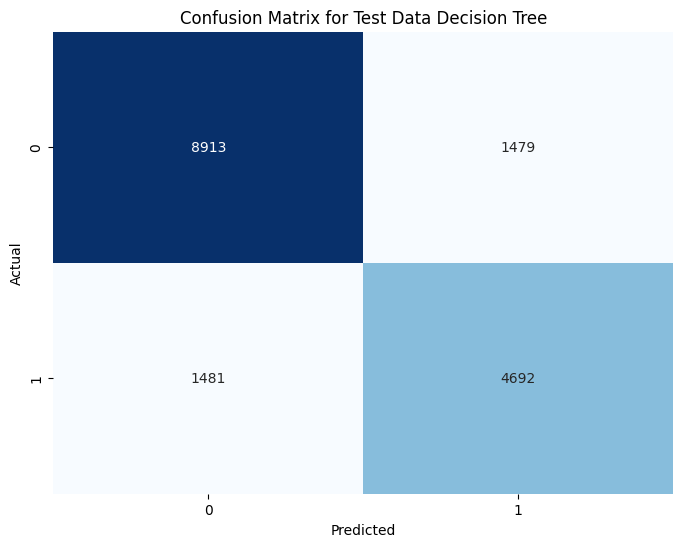

In [ ]:
plt.figure(figsize=(8, 6))
sns.heatmap(cm_test_tree, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.title("Confusion Matrix for Test Data Decision Tree")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

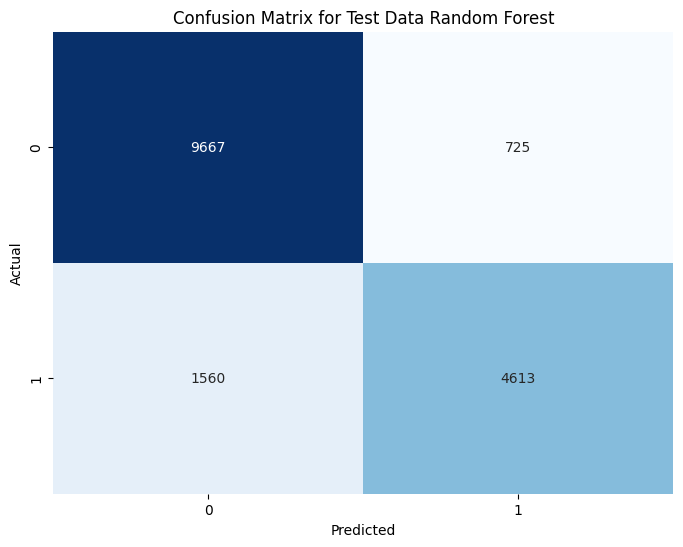

In [ ]:
plt.figure(figsize=(8, 6))
sns.heatmap(cm_test_forest, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.title("Confusion Matrix for Test Data Random Forest")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

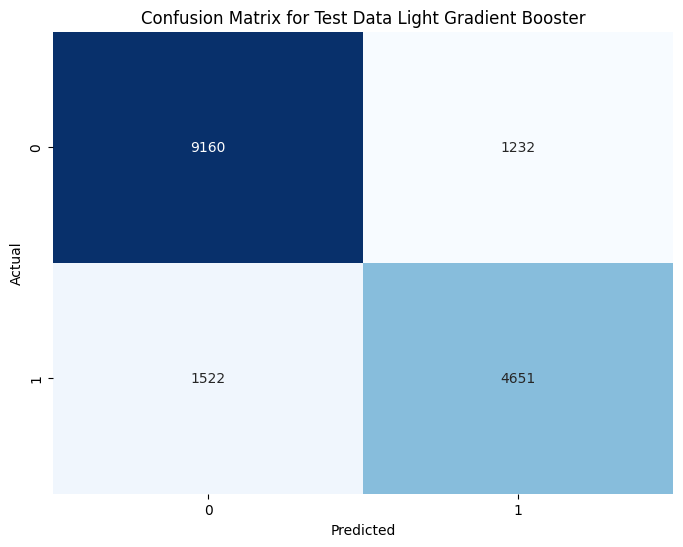

In [ ]:
plt.figure(figsize=(8, 6))
sns.heatmap(cm_test_lgbm, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.title("Confusion Matrix for Test Data Light Gradient Booster")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

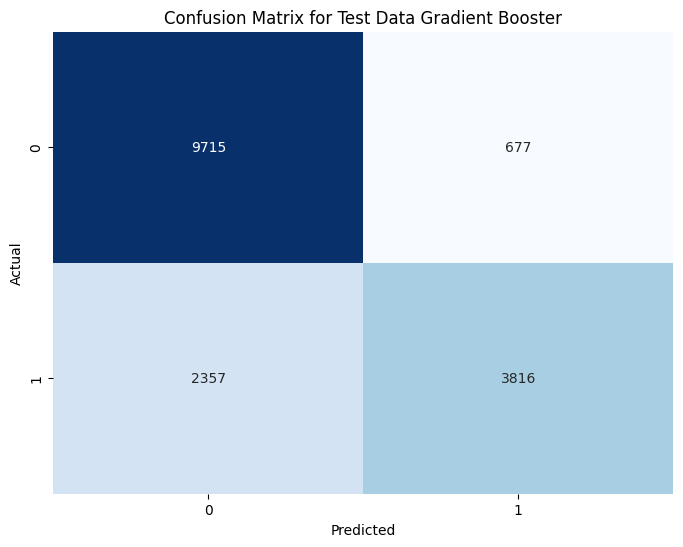

In [ ]:
plt.figure(figsize=(8, 6))
sns.heatmap(cm_test_gbc, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.title("Confusion Matrix for Test Data Gradient Booster")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

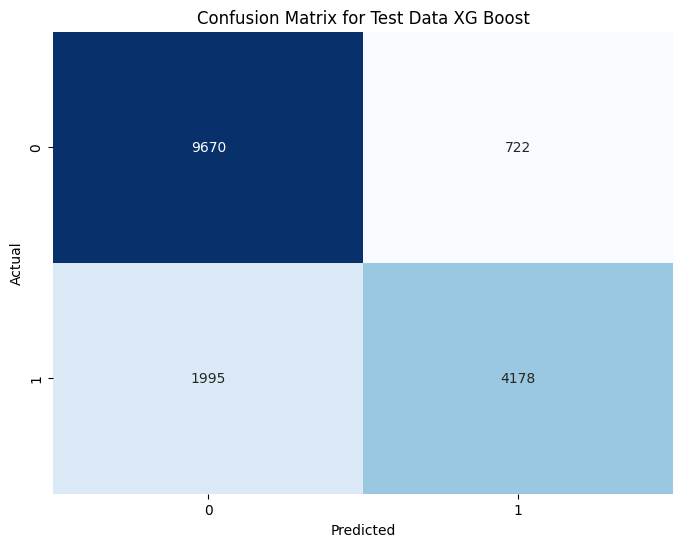

In [ ]:
plt.figure(figsize=(8, 6))
sns.heatmap(cm_test_xgb, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.title("Confusion Matrix for Test Data XG Boost")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

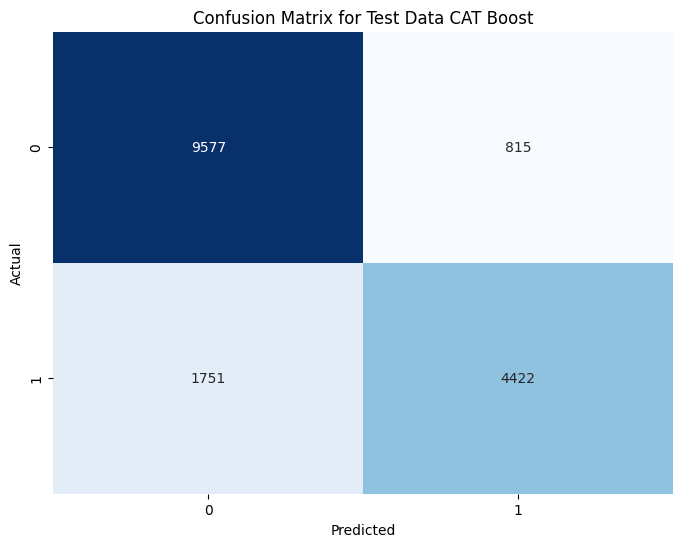

In [ ]:
plt.figure(figsize=(8, 6))
sns.heatmap(cm_test_cat, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.title("Confusion Matrix for Test Data CAT Boost")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

## ROC

/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:86: FutureWarning:

Function plot_roc_curve is deprecated; This will be removed in v0.5.0. Please use scikitplot.metrics.plot_roc instead.



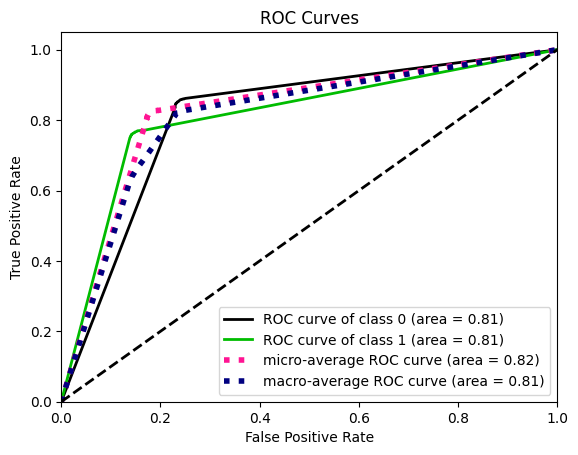

In [ ]:
y_test_pred_tree_prob =  tree.predict_proba(X_test)
skplt.metrics.plot_roc_curve(y_test, y_test_pred_tree_prob);

/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:86: FutureWarning:

Function plot_roc_curve is deprecated; This will be removed in v0.5.0. Please use scikitplot.metrics.plot_roc instead.



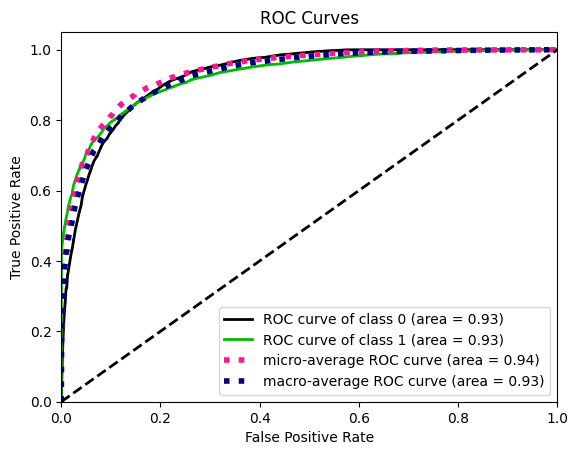

In [ ]:
y_test_pred_forest_prob =  forest.predict_proba(X_test)
skplt.metrics.plot_roc_curve(y_test, y_test_pred_forest_prob);

/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:86: FutureWarning:

Function plot_roc_curve is deprecated; This will be removed in v0.5.0. Please use scikitplot.metrics.plot_roc instead.



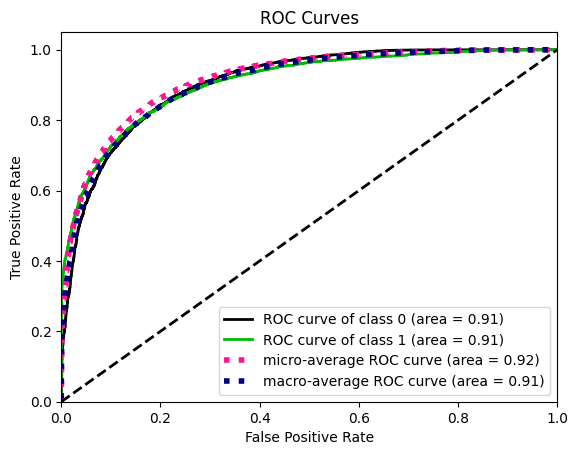

In [ ]:
y_test_pred_lgbm_prob =  lgbm.predict_proba(X_test)
skplt.metrics.plot_roc_curve(y_test, y_test_pred_lgbm_prob);

/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:86: FutureWarning:

Function plot_roc_curve is deprecated; This will be removed in v0.5.0. Please use scikitplot.metrics.plot_roc instead.



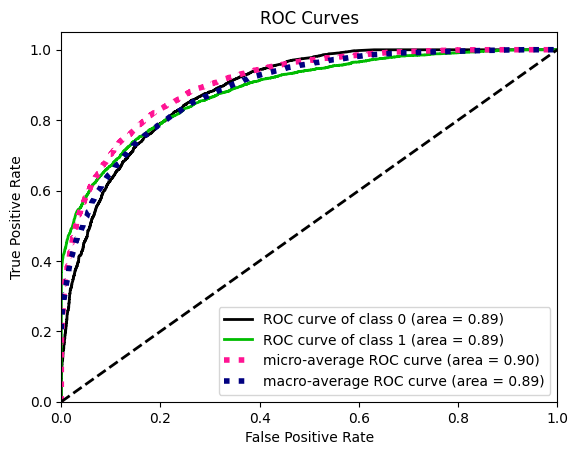

In [ ]:
y_test_pred_gbc_prob =  gbc.predict_proba(X_test)
skplt.metrics.plot_roc_curve(y_test, y_test_pred_gbc_prob);

/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:86: FutureWarning:

Function plot_roc_curve is deprecated; This will be removed in v0.5.0. Please use scikitplot.metrics.plot_roc instead.



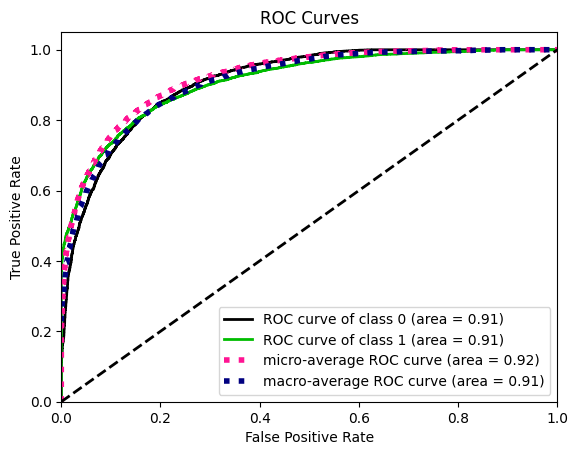

In [ ]:
y_test_pred_xgb_prob =  xgb.predict_proba(X_test)
skplt.metrics.plot_roc_curve(y_test, y_test_pred_xgb_prob);

/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:86: FutureWarning:

Function plot_roc_curve is deprecated; This will be removed in v0.5.0. Please use scikitplot.metrics.plot_roc instead.



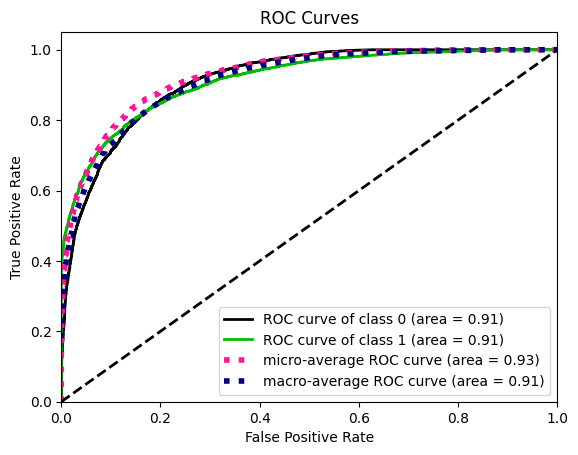

In [ ]:
y_test_pred_cat_prob =  cat.predict_proba(X_test)
skplt.metrics.plot_roc_curve(y_test, y_test_pred_cat_prob);

#Model Testing in test data

In [ ]:
test_df = pd.read_csv("https://raw.githubusercontent.com/Egsy05/Booking-Hotel/main/test.csv")
drop_columns = ['bookingID','country','hotel','reservation_status','reservation_status_date']
test = test_df.drop(columns=drop_columns,axis=0)
filter = test['adr']<0
test = test[~filter]
test_cat = test.dtypes==object
test_cat_cols = test.columns[test_cat].tolist()
test[test_cat_cols] = test[test_cat_cols].apply(lambda col: le.fit_transform(col))
replace_null = ['company','agent','children']
test[replace_null] = test[replace_null].fillna(value=0)
# test['agent'] = np.log(test['agent'] + 1)
# test['lead_time'] = np.log(test['lead_time'] + 1)
# test['company'] = np.log(test['company'] + 1)
# test['adr'] = np.log(test['adr'] + 1)
# test['days_in_waiting_list'] = np.log(test['days_in_waiting_list'] + 1)
# test['arrival_date_week_number'] = np.log(test['arrival_date_week_number'] + 1)
# test['arrival_date_day_of_month'] = np.log(test['arrival_date_day_of_month'] + 1)

In [ ]:
pred_model_tree = tree.predict(test)
pred_model_forest = forest.predict(test)
pred_model_lgbm = lgbm.predict(test)
pred_model_gbc = gbc.predict(test)
pred_model_xgb = xgb.predict(test)
pred_model_cat = cat.predict(test)

In [ ]:
is_canceled_tree = pd.DataFrame(data=pred_model_tree)
is_canceled_tree.columns = ['canceled']
is_canceled_forest = pd.DataFrame(data=pred_model_forest)
is_canceled_forest.columns = ['canceled']
is_canceled_lgbm = pd.DataFrame(data=pred_model_lgbm)
is_canceled_lgbm.columns = ['canceled']
is_canceled_gbc = pd.DataFrame(data=pred_model_gbc)
is_canceled_gbc.columns = ['canceled']
is_canceled_xgb = pd.DataFrame(data=pred_model_xgb)
is_canceled_xgb.columns = ['canceled']
is_canceled_cat = pd.DataFrame(data=pred_model_cat)
is_canceled_cat.columns = ['canceled']

In [ ]:
final_pred_tree = pd.concat([test_df,is_canceled_tree],axis=1)
final_pred_forest = pd.concat([test_df,is_canceled_forest],axis=1)
final_pred_lgbm = pd.concat([test_df,is_canceled_lgbm],axis=1)
final_pred_gbc = pd.concat([test_df,is_canceled_gbc],axis=1)
final_pred_xgb = pd.concat([test_df,is_canceled_xgb],axis=1)
final_pred_cat = pd.concat([test_df,is_canceled_cat],axis=1)

In [ ]:
#checking false negatif
final_pred_tree[(final_pred_tree['reservation_status']=='Canceled')&(final_pred_tree['canceled']==0)].info()

<class 'pandas.core.frame.DataFrame'>
Index: 6284 entries, 4 to 35695
Data columns (total 33 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   hotel                           6284 non-null   object 
 1   lead_time                       6284 non-null   int64  
 2   arrival_date_year               6284 non-null   int64  
 3   arrival_date_month              6284 non-null   object 
 4   arrival_date_week_number        6284 non-null   int64  
 5   arrival_date_day_of_month       6284 non-null   int64  
 6   stays_in_weekend_nights         6284 non-null   int64  
 7   stays_in_week_nights            6284 non-null   int64  
 8   adults                          6284 non-null   int64  
 9   children                        6283 non-null   float64
 10  babies                          6284 non-null   int64  
 11  meal                            6284 non-null   object 
 12  country                         6276 n

In [ ]:
final_pred_forest[(final_pred_forest['reservation_status']=='Canceled')&(final_pred_forest['canceled']==0)].info()

<class 'pandas.core.frame.DataFrame'>
Index: 6811 entries, 0 to 35695
Data columns (total 33 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   hotel                           6811 non-null   object 
 1   lead_time                       6811 non-null   int64  
 2   arrival_date_year               6811 non-null   int64  
 3   arrival_date_month              6811 non-null   object 
 4   arrival_date_week_number        6811 non-null   int64  
 5   arrival_date_day_of_month       6811 non-null   int64  
 6   stays_in_weekend_nights         6811 non-null   int64  
 7   stays_in_week_nights            6811 non-null   int64  
 8   adults                          6811 non-null   int64  
 9   children                        6810 non-null   float64
 10  babies                          6811 non-null   int64  
 11  meal                            6811 non-null   object 
 12  country                         6802 n

In [ ]:
final_pred_lgbm[(final_pred_lgbm['reservation_status']=='Canceled')&(final_pred_lgbm['canceled']==0)].info()

<class 'pandas.core.frame.DataFrame'>
Index: 6516 entries, 0 to 35695
Data columns (total 33 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   hotel                           6516 non-null   object 
 1   lead_time                       6516 non-null   int64  
 2   arrival_date_year               6516 non-null   int64  
 3   arrival_date_month              6516 non-null   object 
 4   arrival_date_week_number        6516 non-null   int64  
 5   arrival_date_day_of_month       6516 non-null   int64  
 6   stays_in_weekend_nights         6516 non-null   int64  
 7   stays_in_week_nights            6516 non-null   int64  
 8   adults                          6516 non-null   int64  
 9   children                        6515 non-null   float64
 10  babies                          6516 non-null   int64  
 11  meal                            6516 non-null   object 
 12  country                         6508 n

In [ ]:
final_pred_gbc[(final_pred_gbc['reservation_status']=='Canceled')&(final_pred_gbc['canceled']==0)].info()

<class 'pandas.core.frame.DataFrame'>
Index: 7752 entries, 4 to 35695
Data columns (total 33 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   hotel                           7752 non-null   object 
 1   lead_time                       7752 non-null   int64  
 2   arrival_date_year               7752 non-null   int64  
 3   arrival_date_month              7752 non-null   object 
 4   arrival_date_week_number        7752 non-null   int64  
 5   arrival_date_day_of_month       7752 non-null   int64  
 6   stays_in_weekend_nights         7752 non-null   int64  
 7   stays_in_week_nights            7752 non-null   int64  
 8   adults                          7752 non-null   int64  
 9   children                        7751 non-null   float64
 10  babies                          7752 non-null   int64  
 11  meal                            7752 non-null   object 
 12  country                         7742 n

In [ ]:
final_pred_xgb[(final_pred_xgb['reservation_status']=='Canceled')&(final_pred_xgb['canceled']==0)].info()

<class 'pandas.core.frame.DataFrame'>
Index: 7272 entries, 0 to 35695
Data columns (total 33 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   hotel                           7272 non-null   object 
 1   lead_time                       7272 non-null   int64  
 2   arrival_date_year               7272 non-null   int64  
 3   arrival_date_month              7272 non-null   object 
 4   arrival_date_week_number        7272 non-null   int64  
 5   arrival_date_day_of_month       7272 non-null   int64  
 6   stays_in_weekend_nights         7272 non-null   int64  
 7   stays_in_week_nights            7272 non-null   int64  
 8   adults                          7272 non-null   int64  
 9   children                        7271 non-null   float64
 10  babies                          7272 non-null   int64  
 11  meal                            7272 non-null   object 
 12  country                         7262 n

In [ ]:
final_pred_cat[(final_pred_cat['reservation_status']=='Canceled')&(final_pred_cat['canceled']==0)].info()

<class 'pandas.core.frame.DataFrame'>
Index: 6906 entries, 0 to 35695
Data columns (total 33 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   hotel                           6906 non-null   object 
 1   lead_time                       6906 non-null   int64  
 2   arrival_date_year               6906 non-null   int64  
 3   arrival_date_month              6906 non-null   object 
 4   arrival_date_week_number        6906 non-null   int64  
 5   arrival_date_day_of_month       6906 non-null   int64  
 6   stays_in_weekend_nights         6906 non-null   int64  
 7   stays_in_week_nights            6906 non-null   int64  
 8   adults                          6906 non-null   int64  
 9   children                        6905 non-null   float64
 10  babies                          6906 non-null   int64  
 11  meal                            6906 non-null   object 
 12  country                         6896 n

note: pelajari cohort analyst untuk prediksi cancel